# Exploratory Data Analysis (EDA) Madrid

En este ejercicio vamos a utilizar el excel **`DatosMadrid.xlsx`**, este excel contiene información sobre los distritos y barrios de Madrid.

Para esta actividad vamos a explorar el **`DataFrame`**, veamos que tipo de información tiene y luego vamos a generar visualizaciones que represente la información del **`DataFrame`**.

Este ejercicio es libre, es decir, puedes decidir que información poner en las visualizaciones y cuantas quieres hacer, la idea es realizar un **`EDA`** y entender los datos con los que estamos trabajando.

Busca un archivo **`GeoJSON`** para representar información en un **`Choropleth`** de los barrios/distritos.

Prueba creando tus propios atributos utilizando la información del **`DataFrame`**.

Escribe en un documento (o en el notebook) una lista de todas las graficas que quieres hacer y lo que representan, como por ejemplo:<br> **`El número de personas mayores de 65 por barrio o municipio`**.

Durante este proceso lo más probable es que consigas valores atípicos (**outliers**) y/o valores faltantes (**NaN's**).

Al final del ejercicios explica las gráficas y tus hallazgos/conclusiones.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [2]:
# DataFrame con toda la información del excel
df = pd.read_excel("DatosMadrid.xlsx")
df.head(3)

Municipio Distrito      Barrios  Población  0-15 años  16-64 años  \
0    Madrid   Centro          NaN     140991      10919      107548   
1    Madrid   Centro      Palacio      23695       1825       17342   
2    Madrid   Centro  Embajadores      47224       3914       36697   

   65 o más años  Edad  promedio    Densidad  Superficie  ...  \
0          22006           43.89  261.823804       5.228  ...   
1           4426           45.78  161.190476       1.470  ...   
2           6437           42.69  457.596899       1.032  ...   

   Seguridad Percibida de Noche  Delitos intervencion policial  \
0                          69.8                           1936   
1                          69.8                            325   
2                          69.8                            648   

   Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                            309           4830.0               -0.2   
1                             52           4764.0               -0.1   
2                            104           4162.0                0.0   

   Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                -1.000           -5.100                    5096.0   
1                 0.008            0.018                    5073.0   
2                -1.700           -7.300                    4489.0   

   Satisfacción de vivir en su barrio \n  \
0                                   77.3   
1                                   77.3   
2                                   77.3   

   Calidad de vida actual en su barrio \n  
0                                    73.6  
1                                    73.6  
2                                    73.6  

[3 rows x 50 columns]

In [3]:
df[df["Distrito"] == "Centro"]

Municipio Distrito      Barrios  Población  0-15 años  16-64 años  \
0    Madrid   Centro          NaN     140991      10919      107548   
1    Madrid   Centro      Palacio      23695       1825       17342   
2    Madrid   Centro  Embajadores      47224       3914       36697   
3    Madrid   Centro       Cortes      10793        772        8191   
4    Madrid   Centro     Justicia      18092       1419       13775   
5    Madrid   Centro  Universidad      33540       2503       25700   
6    Madrid   Centro          Sol       7647        486        5843   

   65 o más años  Edad  promedio    Densidad  Superficie  ...  \
0          22006           43.89  261.823804       5.228  ...   
1           4426           45.78  161.190476       1.470  ...   
2           6437           42.69  457.596899       1.032  ...   
3           1808           44.78  182.314189       0.592  ...   
4           2827           44.09  243.827493       0.742  ...   
5           5215           43.68  354.171067       0.947  ...   
6           1293           44.63  171.842697       0.445  ...   

   Seguridad Percibida de Noche  Delitos intervencion policial  \
0                          69.8                           1936   
1                          69.8                            325   
2                          69.8                            648   
3                          69.8                            148   
4                          69.8                            248   
5                          69.8                            460   
6                          69.8                            105   

   Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                            309           4830.0             -0.200   
1                             52           4764.0             -0.100   
2                            104           4162.0              0.000   
3                             24           5229.0              0.015   
4                             40           5707.0              0.012   
5                             74           5051.0              0.003   
6                             17           4901.0             -2.300   

   Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                -1.000           -5.100                    5096.0   
1                 0.008            0.018                    5073.0   
2                -1.700           -7.300                    4489.0   
3                 0.030           -2.100                    5481.0   
4                -1.700           -1.700                    6120.0   
5                -1.000           -4.400                    5497.0   
6                -2.000           -1.600                    5468.0   

   Satisfacción de vivir en su barrio \n  \
0                                   77.3   
1                                   77.3   
2                                   77.3   
3                                   77.3   
4                                   77.3   
5                                   77.3   
6                                   77.3   

   Calidad de vida actual en su barrio \n  
0                                    73.6  
1                                    73.6  
2                                    73.6  
3                                    73.6  
4                                    73.6  
5                                    73.6  
6                                    73.6  

[7 rows x 50 columns]

In [4]:
df.columns.to_list()

['Municipio',
 'Distrito',
 'Barrios',
 'Población',
 '0-15 años',
 '16-64 años',
 '65 o más años',
 'Edad  promedio',
 'Densidad',
 'Superficie',
 'Índice de la estructura de  la población activa',
 'Tasa de desempleo',
 'Nacimientos',
 'Defunciones',
 'Inmigración',
 'Emigración',
 'Renta neta media anual de los hogares\n',
 'Actividades economicas',
 'Educacion',
 'Centros Universitarios',
 'Sanidad',
 'Bibliotecas',
 'Instalaciones deportivas(Polideportivos, no básicas',
 'Zonas verdes (m2)',
 'Latidud',
 'Longitud',
 'Distancia al centro (km)',
 'Metro',
 'Tren',
 'Autobus',
 'Calidad del aire',
 'PM2,5',
 'PM10',
 'NO2',
 'O3',
 'SO2',
 'Monumentos',
 'Ocio/cultura',
 'Residuos generados',
 'Seguridad Percibida día',
 'Seguridad Percibida de Noche',
 'Delitos intervencion policial',
 'Delitos contra seguridad vial',
 'Precio feb 2021',
 'Variación mensual',
 'Variación trimestral',
 'Variación anual',
 'Máximo histórico(precio)',
 'Satisfacción de vivir en su barrio \n',
 'Calida

In [5]:
df.info()
#  'Centros Universitarios',
#  'Sanidad',
#  'Bibliotecas',
#  'Instalaciones deportivas(Polideportivos, no básicas',

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 50 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Municipio                                            152 non-null    object 
 1   Distrito                                             152 non-null    object 
 2   Barrios                                              131 non-null    object 
 3   Población                                            152 non-null    int64  
 4   0-15 años                                            152 non-null    int64  
 5   16-64 años                                           152 non-null    int64  
 6   65 o más años                                        152 non-null    int64  
 7   Edad  promedio                                       152 non-null    float64
 8   Densidad                                             152 non-null    f

In [6]:
# DataFrame de distrito
df_distritos = df[df["Barrios"].isnull() == True]
df_distritos.head(3)

Municipio    Distrito Barrios  Población  0-15 años  16-64 años  \
0     Madrid      Centro     NaN     140991      10919      107548   
7     Madrid  Arganzuela     NaN     155660      19104      106145   
15    Madrid      Retiro     NaN     120873      14928       74251   

    65 o más años  Edad  promedio      Densidad  Superficie  ...  \
0           22006           43.89    261.823804       5.228  ...   
7           30411           44.71  23306.440000       6.478  ...   
15          31227           47.13  21867.530000       5.448  ...   

    Seguridad Percibida de Noche  Delitos intervencion policial  \
0                           69.8                           1936   
7                           68.6                            296   
15                          66.6                            178   

    Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                             309           4830.0             -0.200   
7                             103           3915.0              0.000   
15                            113           4537.0              0.009   

    Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                 -1.000           -5.100                    5096.0   
7                  0.000            0.006                    4096.0   
15                 0.004           -0.300                    4669.0   

    Satisfacción de vivir en su barrio \n  \
0                                    77.3   
7                                    81.3   
15                                   82.2   

    Calidad de vida actual en su barrio \n  
0                                     73.6  
7                                     77.9  
15                                    80.2  

[3 rows x 50 columns]

In [7]:
# DataFrame de barrios
df_barrios = df[df["Barrios"].isnull() == False]
df_barrios.head(3)

Municipio Distrito      Barrios  Población  0-15 años  16-64 años  \
1    Madrid   Centro      Palacio      23695       1825       17342   
2    Madrid   Centro  Embajadores      47224       3914       36697   
3    Madrid   Centro       Cortes      10793        772        8191   

   65 o más años  Edad  promedio    Densidad  Superficie  ...  \
1           4426           45.78  161.190476       1.470  ...   
2           6437           42.69  457.596899       1.032  ...   
3           1808           44.78  182.314189       0.592  ...   

   Seguridad Percibida de Noche  Delitos intervencion policial  \
1                          69.8                            325   
2                          69.8                            648   
3                          69.8                            148   

   Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
1                             52           4764.0             -0.100   
2                            104           4162.0              0.000   
3                             24           5229.0              0.015   

   Variación trimestral  Variación anual  Máximo histórico(precio)  \
1                 0.008            0.018                    5073.0   
2                -1.700           -7.300                    4489.0   
3                 0.030           -2.100                    5481.0   

   Satisfacción de vivir en su barrio \n  \
1                                   77.3   
2                                   77.3   
3                                   77.3   

   Calidad de vida actual en su barrio \n  
1                                    73.6  
2                                    73.6  
3                                    73.6  

[3 rows x 50 columns]

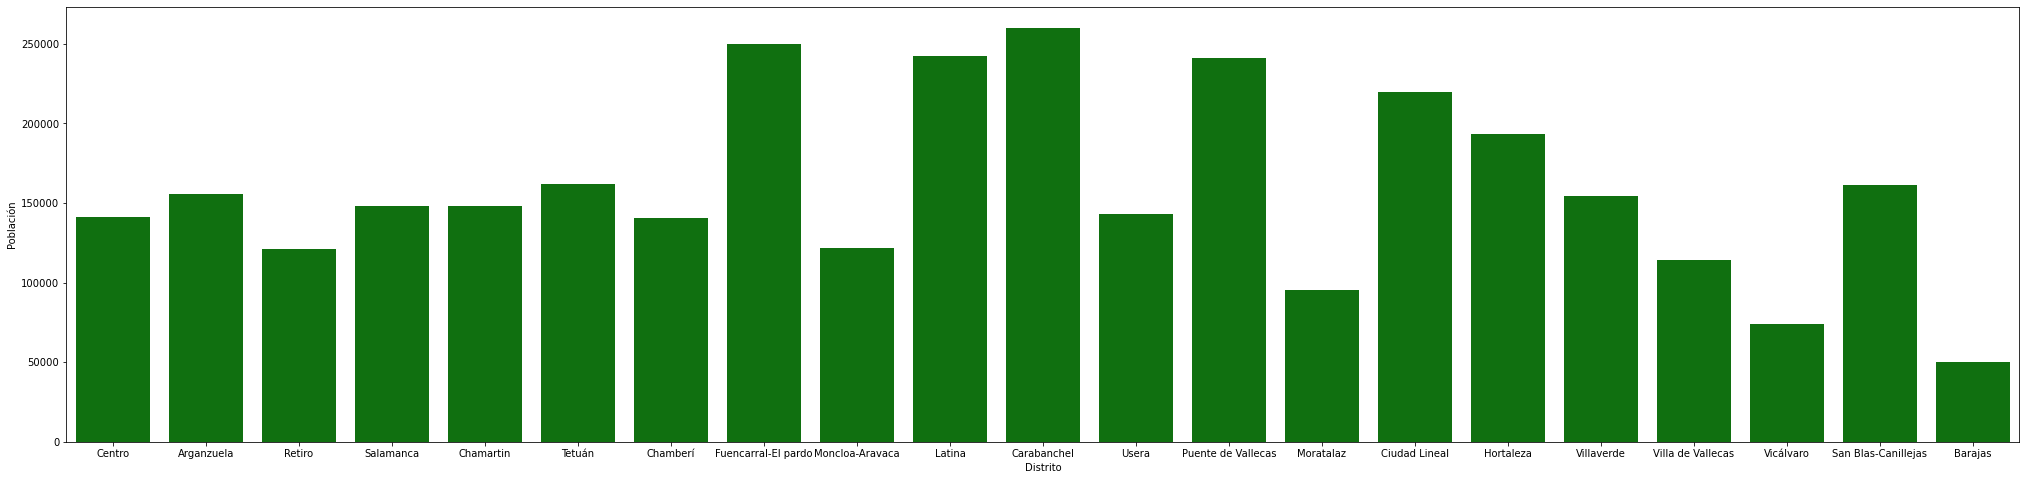

In [8]:
# Población por distritos
plt.figure(figsize = (35, 8))
sns.barplot(x = df_distritos["Distrito"], y = df_distritos["Población"], color = "green")
plt.show()

In [9]:
len(df_distritos["Distrito"]) # 21 distritos

21

In [10]:
lista_distritos = df_distritos["Distrito"].unique().reshape(7, 3) #lista de distritos
lista_distritos

array([['Centro', 'Arganzuela', 'Retiro'],
       ['Salamanca', 'Chamartin', 'Tetuán'],
       ['Chamberí', 'Fuencarral-El pardo', 'Moncloa-Aravaca'],
       ['Latina', 'Carabanchel', 'Usera'],
       ['Puente de Vallecas', 'Moratalaz', 'Ciudad Lineal'],
       ['Hortaleza', 'Villaverde', 'Villa de Vallecas'],
       ['Vicálvaro', 'San Blas-Canillejas', 'Barajas']], dtype=object)

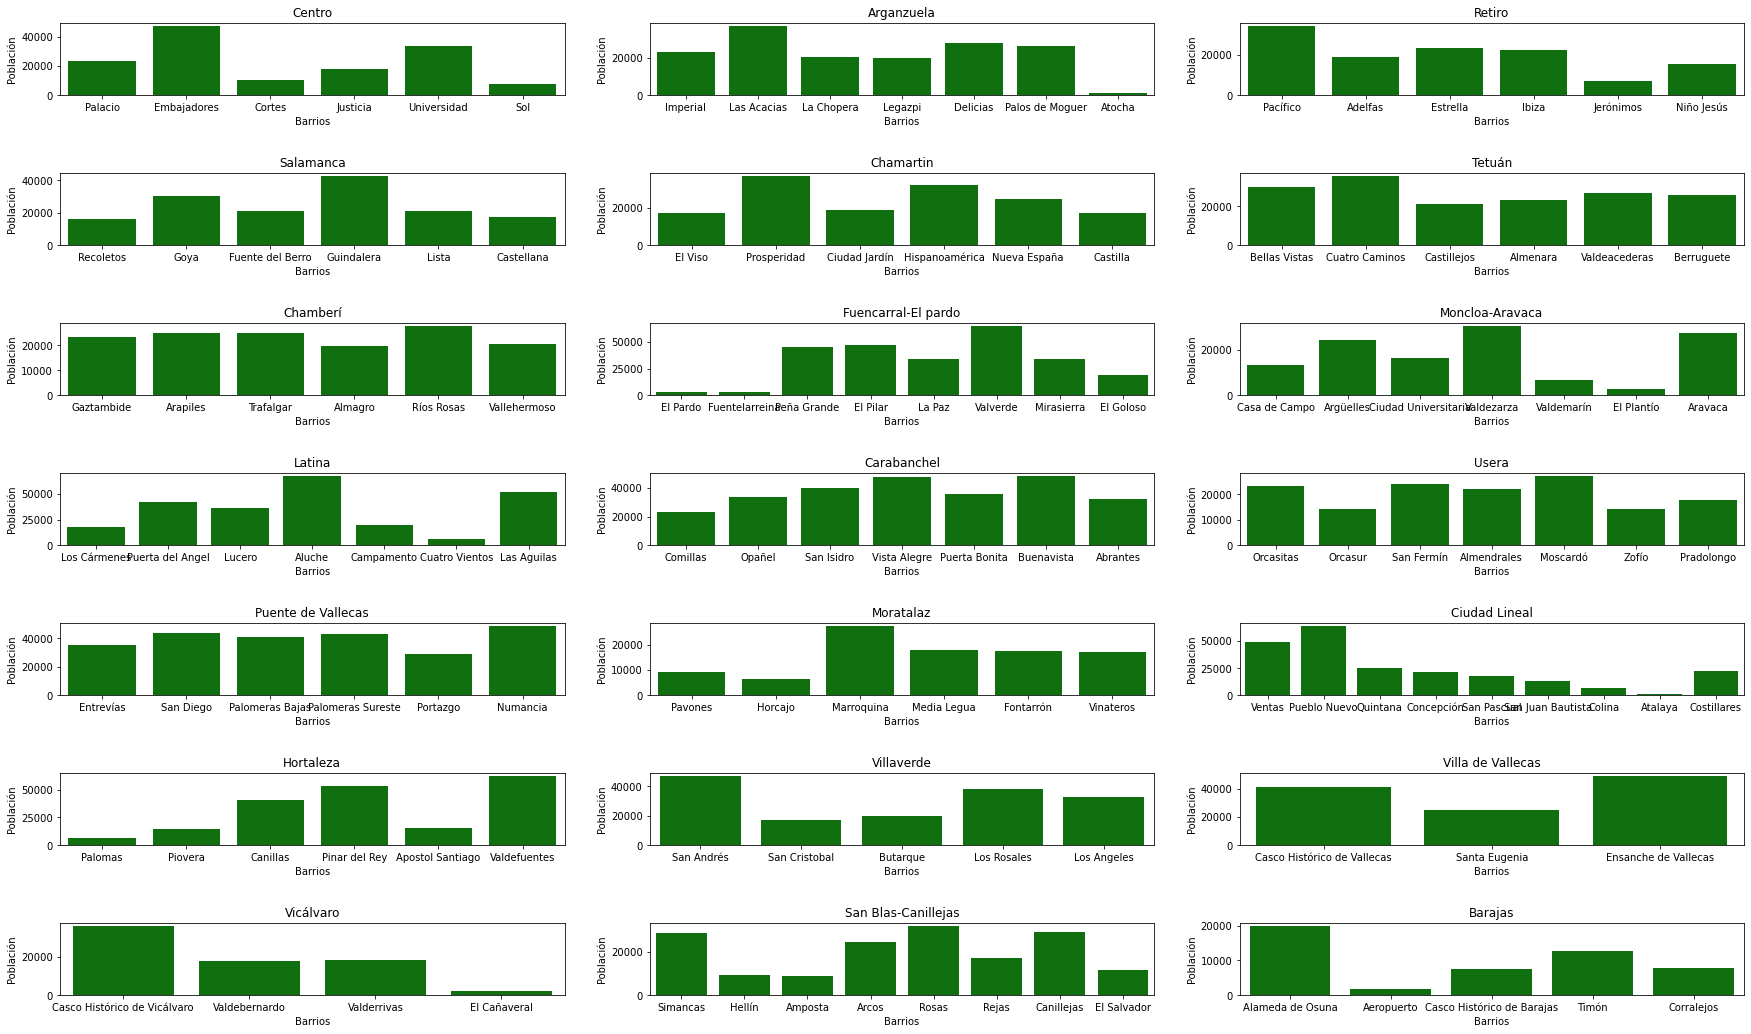

In [11]:
# Población por barrios y distrito

fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize = (25, 15))
for i in range(7):
    for j in range(3):
        sns.barplot(ax = ax[i, j],
                    x = df_barrios[df_barrios["Distrito"] == lista_distritos[i,j]]["Barrios"],
                    y = df_barrios["Población"],
                    color = "green")
        ax[i, j].set_title(lista_distritos[i, j])
fig.tight_layout(pad=3.0)
plt.show()



In [12]:
#df_barrios[df_barrios["Distrito"] == "Centro"]

df_barrios[df_barrios["Distrito"] == "Centro"]["Barrios"]


1        Palacio
2    Embajadores
3         Cortes
4       Justicia
5    Universidad
6            Sol
Name: Barrios, dtype: object

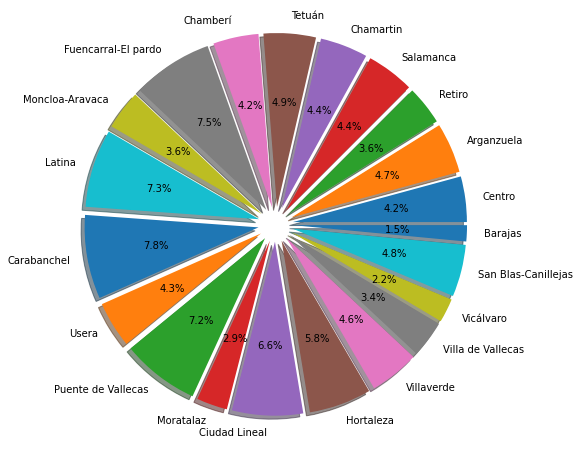

In [13]:
# Proporción de población por distrito
plt.figure(figsize = (12, 8))
plt.pie(df_distritos["Población"],
        labels = df_distritos["Distrito"] ,
        shadow = True,
        explode = [0.1 for i in range(21)],
        autopct = "%1.1f%%")  
plt.show()  
# autopct = "%1.1f%%": con .1 indico que tendrá sólo un decimal, %1 indica que será un entero y otro dígito, "f%" es formato

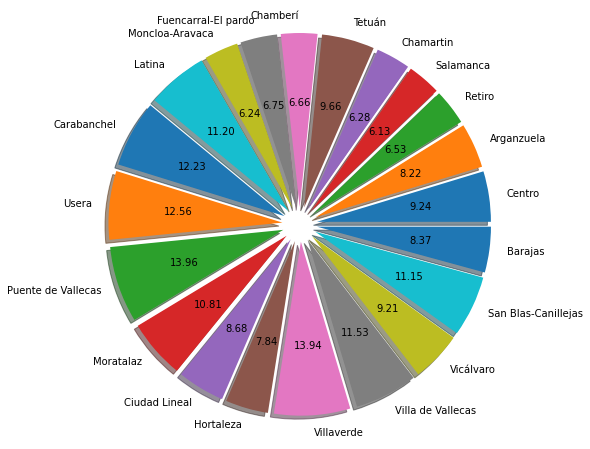

In [14]:
# Proporción de tasa de desempleo por distrito
plt.figure(figsize = (12, 8))

values = np.array(df_distritos["Tasa de desempleo"].value_counts(sort = False).index.to_list())

plt.pie(values,
        labels = df_distritos["Distrito"].value_counts(sort = False).index ,
        shadow = True,
        explode = [0.1 for i in range(21)],
        autopct = lambda x : '{:.2f}'.format(x*values.sum()/100))  
plt.show()  
# autopct = "%1.1f%%": con .1 indico que tendrá sólo un decimal, %1 indica que será un entero y otro dígito, "f%" es formato

In [15]:
values

array([ 9.24      ,  8.22      ,  6.52833333,  6.13166667,  6.285     ,
        9.665     ,  6.66      ,  6.755     ,  6.24142857, 11.2       ,
       12.22714286, 12.56428571, 13.96      , 10.81166667,  8.67555556,
        7.84166667, 13.938     , 11.53      ,  9.21      , 11.15375   ,
        8.37      ])

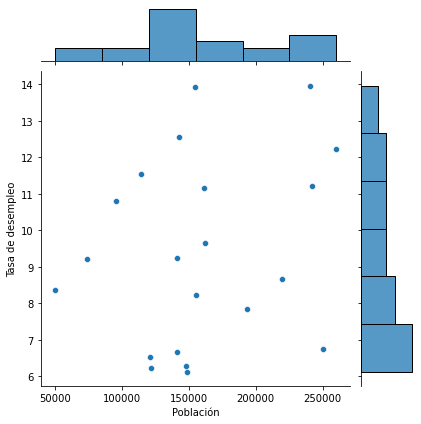

In [16]:
# Relación entre población y tasa de desempleo por distritos: No hay relación
sns.jointplot(x = df_distritos["Población"], y = df_distritos["Tasa de desempleo"])
plt.show()

<AxesSubplot:xlabel='65 o más años', ylabel='Count'>

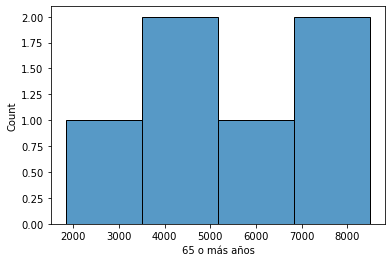

In [17]:
sns.histplot(df_barrios[df_barrios["Distrito"]=="Retiro"]["65 o más años"])


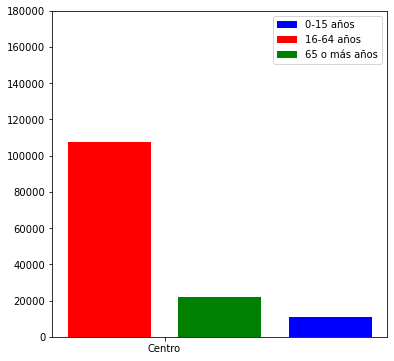

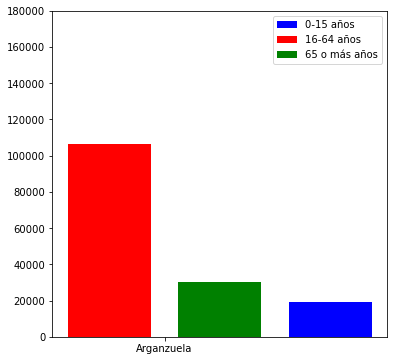

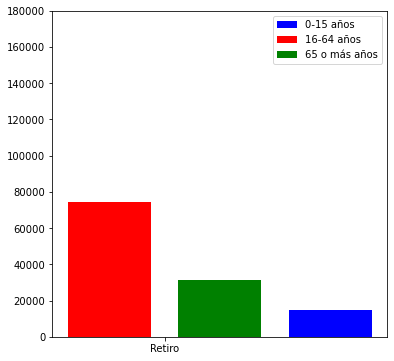

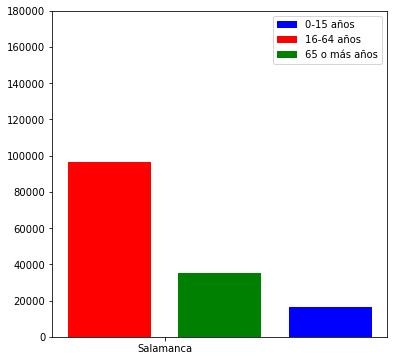

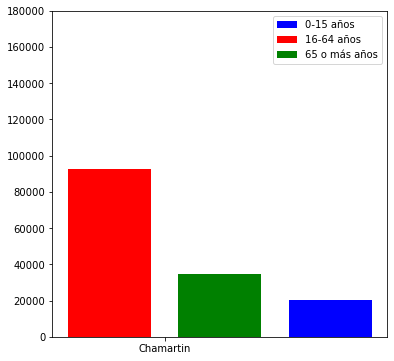

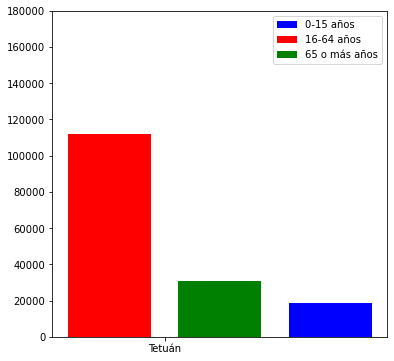

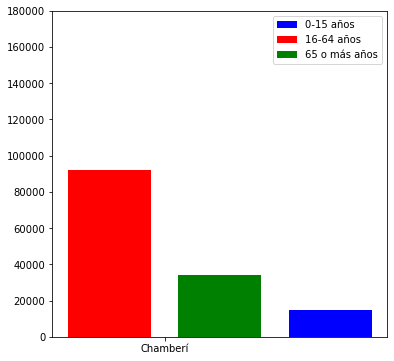

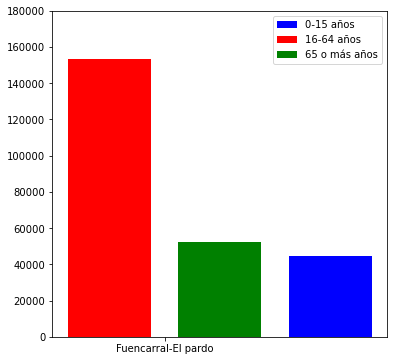

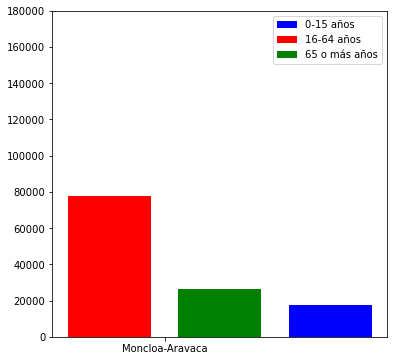

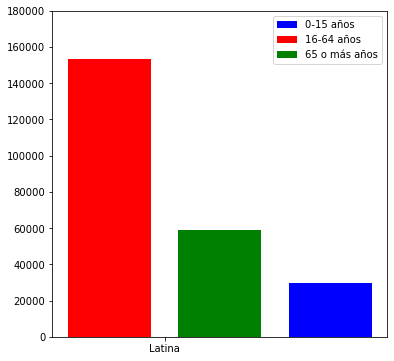

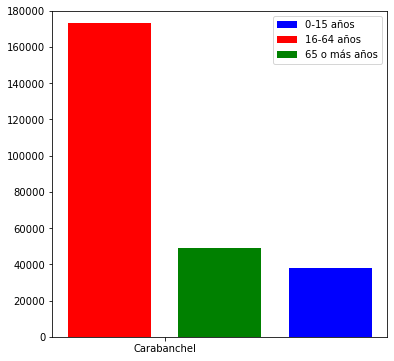

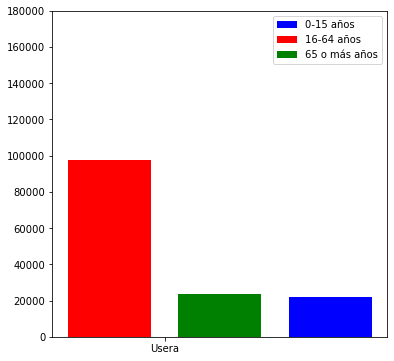

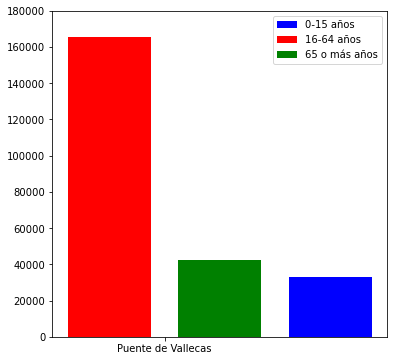

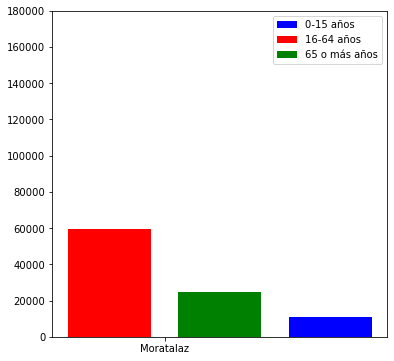

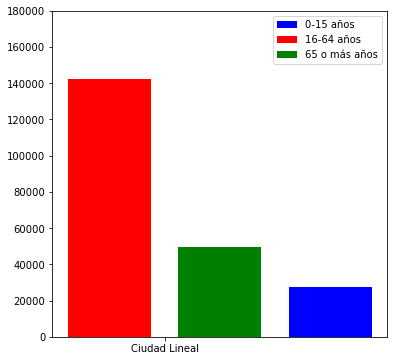

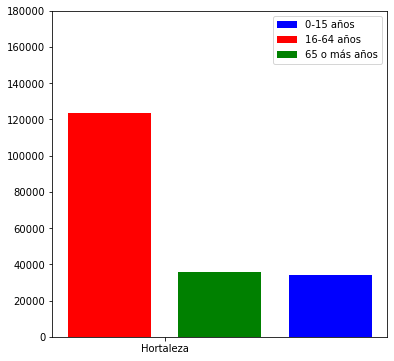

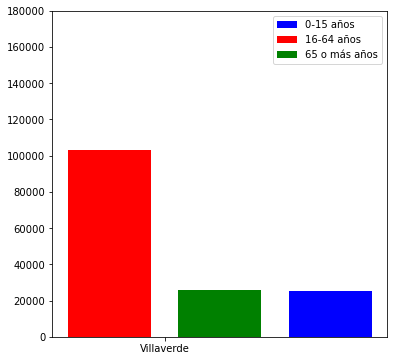

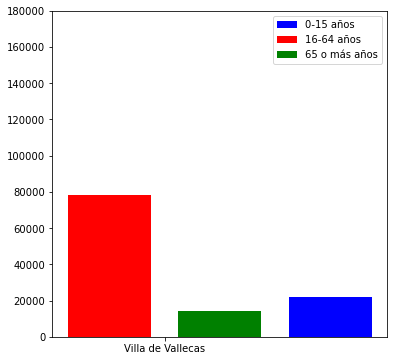

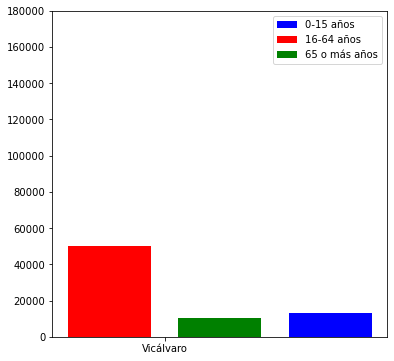

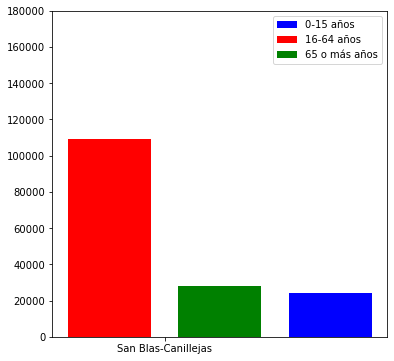

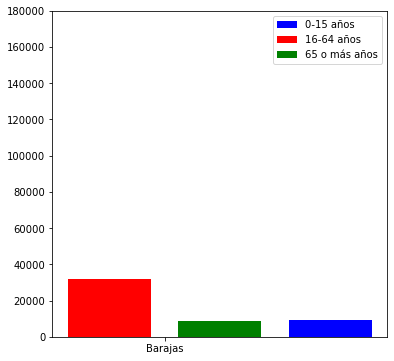

In [18]:
# Comparación por rango de edad por distritos

for dist in df_distritos["Distrito"].unique():
    
    fig, ax = plt.subplots(figsize = (6, 6)) # Tamaño
    etiquetas = [dist]
    valores1 = df_distritos[df_distritos["Distrito"] == dist]["0-15 años"]
    valores2 = df_distritos[df_distritos["Distrito"] == dist]["16-64 años"]
    valores3 = df_distritos[df_distritos["Distrito"] == dist]["65 o más años"]


    x = np.arange(len(etiquetas)) # Devuelve un array de la misma longitud que las etiquetas

    ancho = 0.4 # Para el ancho de las barras
    # En el primer parámetro, le digo dónde ubicar la barra. Lo desplazo respecto la ubicación de la etiqueta
    plt.bar(x + ancho/1, valores1, 0.2, color = "blue", label = "0-15 años")
    plt.bar(x - ancho/3, valores2, 0.2, color = "red", label = "16-64 años")
    plt.bar(x + ancho/3, valores3, 0.2, color = "green", label = "65 o más años")
    plt.legend(loc = "best")
    plt.ylim(0,180000)


    ax.set_xticks(x) # Usa las etiquetas que están en x, para fijar los puntos
    ax.set_xticklabels(etiquetas) # Pone los valores de "etiquetas" en las posiciones establecidas en el paso anterior
    plt.show()

In [19]:
#Comparación de nacimientos y defunciones

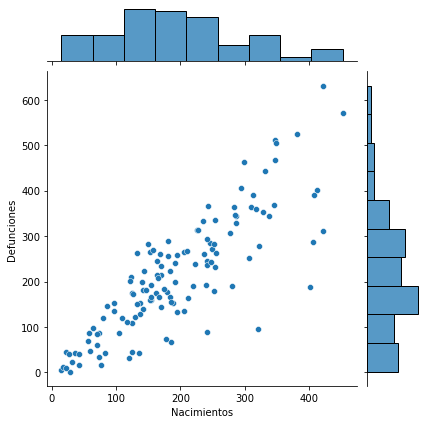

In [20]:
sns.jointplot(x = df_barrios[df_barrios["Nacimientos"]<600]["Nacimientos"], y = df_barrios["Defunciones"])
plt.show()#Hay tres outLiers en nacimientos mayores de 600

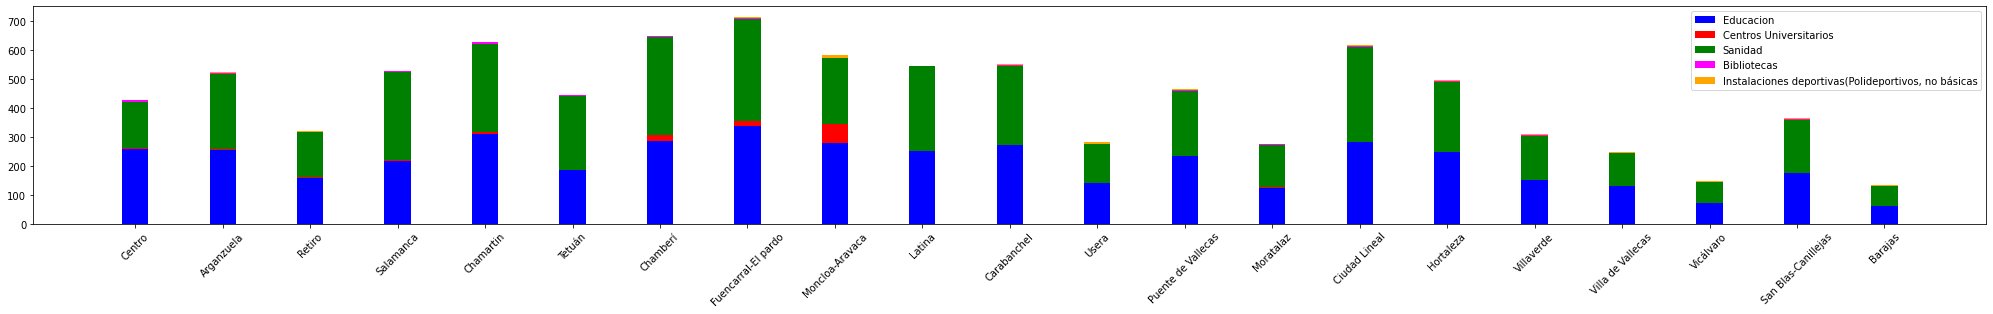

In [21]:
# Comparación de equipación por distritos (Educación, Centros Universitarios, Sanidad, Bibliotecas
# e Instalaciones deportivas)

fig, ax = plt.subplots(figsize = (35, 4))

etiquetas=df_distritos["Distrito"].unique().tolist()
valores1=df_distritos["Educacion"].tolist()
valores2=df_distritos["Centros Universitarios"].tolist()
valores3=df_distritos["Sanidad"].tolist()
valores4=df_distritos["Bibliotecas"].tolist()
valores5=df_distritos["Instalaciones deportivas(Polideportivos, no básicas"].tolist()

x = np.arange(len(etiquetas)) 
ancho = 0.3

plt.bar(etiquetas, valores1, ancho, color = "blue", label="Educacion")
plt.bar(etiquetas, valores2, ancho, color = "red", label="Centros Universitarios",     bottom = valores1)
plt.bar(etiquetas, valores3, ancho, color = "green", label="Sanidad",   bottom = np.array(valores2) + np.array(valores1))
plt.bar(etiquetas, valores4, ancho, color = "magenta", label="Bibliotecas", bottom = np.array(valores3) + np.array(valores2) + np.array(valores1))
plt.bar(etiquetas, valores5, ancho, color = "orange", label="Instalaciones deportivas(Polideportivos, no básicas", bottom = np.array(valores4) + np.array(valores3) + np.array(valores2) + np.array(valores1))
plt.legend(loc = "best")


ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.xticks(rotation = 45)
plt.show()

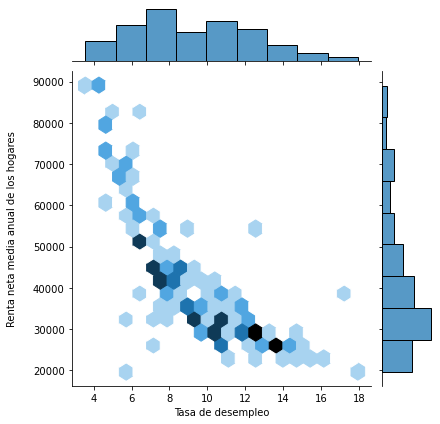

In [22]:
# Relación entre "Tasa de desempleo" y "Renta neta media anual de los hogares" por barrio
sns.jointplot(x = df_barrios["Tasa de desempleo"], 
              y = df_barrios["Renta neta media anual de los hogares\n"],
              kind = "hex",
              gridsize = 20)
plt.show()

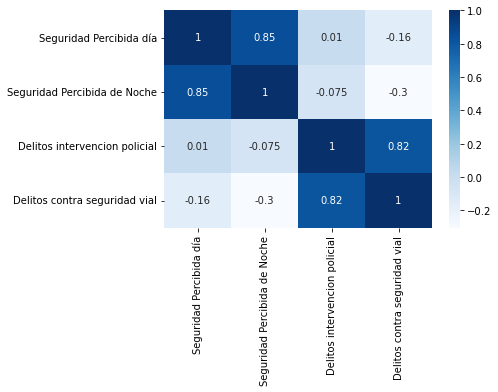

In [23]:
# Relación entre "Seguridad Percibida día", "Seguridad Percibida de Noche",
# "Delitos intervencion policial" y "Delitos contra seguridad vial" por barrios
sns.heatmap(data = df_barrios[["Seguridad Percibida día", "Seguridad Percibida de Noche", "Delitos intervencion policial","Delitos contra seguridad vial"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [24]:
df_barrios["Transporte"]=df_barrios.loc[:,"Tren"]+df_barrios.loc[:,"Metro"]+df_barrios.loc[:,"Autobus"]
df_barrios["Transporte"]

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_14984/1653286116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barrios["Transporte"]=df_barrios.loc[:,"Tren"]+df_barrios.loc[:,"Metro"]+df_barrios.loc[:,"Autobus"]


1      2.0
2      3.0
3      2.0
4      2.0
5      2.0
      ... 
147    2.0
148    3.0
149    1.0
150    2.0
151    2.0
Name: Transporte, Length: 131, dtype: float64

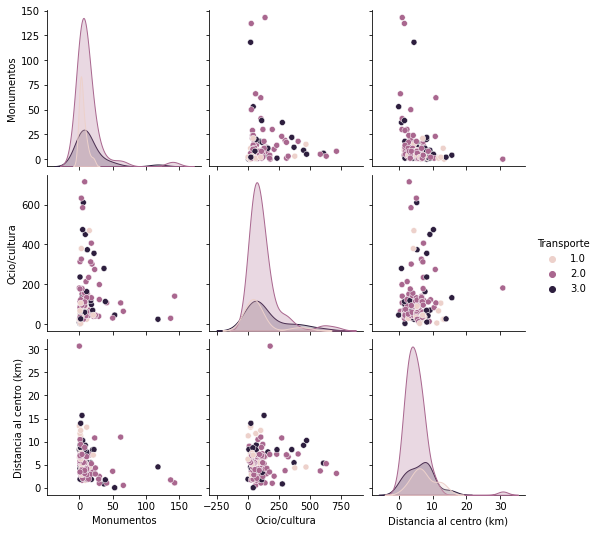

In [93]:
# Medios de transporte en relación a monumentos, ocio/cultura y distancia al centro(km) por barrios

sns.pairplot(df_barrios[df_barrios["Distancia al centro (km)"]<4000] ,vars=["Monumentos","Ocio/cultura","Distancia al centro (km)"], hue = "Transporte") 
plt.show()

In [94]:
# Máximo histórico (precio) en Madrid por barrios (SIN DEPURAR)

madrid_map = folium.Map(location = [40.4637, -3.7492], zoom_start = 10)

folium.Choropleth(geo_data     = "madrid.json",
                     data         = df_barrios,
                     columns      = ["Barrios", "Máximo histórico(precio)"],
                     key_on       = "feature.properties.name",
                     fill_color   = "Blues", 
                     fill_opacity = 0.7, 
                     line_opacity = 0.2,
                     legend_name  = "Máximo precio histórico en Madrid").add_to(madrid_map)


madrid_map


In [27]:
import json
# Cargamos fichero json
with open("madrid.json", "br") as file:
    madrid_json = json.load(file)

In [28]:
# Pasamos los barrios del json a una lista
nombres = []

for i in range(len(madrid_json["features"])):
    nombres.append(madrid_json["features"][i]["properties"]["name"])
    
nombres #128

['Palacio',
 'Embajadores',
 'Cortes',
 'Justicia',
 'Universidad',
 'Sol',
 'Imperial',
 'Acacias',
 'Chopera',
 'Legazpi',
 'Delicias',
 'Palos de Moguer',
 'Atocha',
 'Pacífico',
 'Adelfas',
 'Estrella',
 'Ibiza',
 'Jerónimos',
 'Niño Jesús',
 'Recoletos',
 'Goya',
 'Fuente del Berro',
 'Guindalera',
 'Lista',
 'Castellana',
 'El Viso',
 'Prosperidad',
 'Ciudad Jardín',
 'Hispanoamérica',
 'Nueva España',
 'Castilla',
 'Bellas Vistas',
 'Cuatro Caminos',
 'Castillejos',
 'Almenara',
 'Valdeacederas',
 'Berruguete',
 'Gaztambide',
 'Arapiles',
 'Trafalgar',
 'Almagro',
 'Rios Rosas',
 'Vallehermoso',
 'El Pardo',
 'Fuentelareina',
 'Peñagrande',
 'Pilar',
 'La Paz',
 'Valverde',
 'Mirasierra',
 'El Goloso',
 'Casa de Campo',
 'Argüelles',
 'Ciudad Universitaria',
 'Valdezarza',
 'Valdemarín',
 'El Plantío',
 'Aravaca',
 'Cármenes',
 'Puerta del Angel',
 'Lucero',
 'Aluche',
 'Campamento',
 'Cuatro Vientos',
 'Aguilas',
 'Comillas',
 'Opañel',
 'San Isidro',
 'Vista Alegre',
 'Puerta 

In [29]:
df_nombres = pd.DataFrame(nombres, columns = ["Barrios"])
df_nombres.head(3)

Barrios
0      Palacio
1  Embajadores
2       Cortes

In [30]:
barrios = df_barrios["Barrios"].tolist()
barrios #131

['Palacio',
 'Embajadores',
 'Cortes',
 'Justicia',
 'Universidad',
 'Sol',
 'Imperial',
 'Las Acacias',
 'La Chopera',
 'Legazpi',
 'Delicias',
 'Palos de Moguer',
 'Atocha',
 'Pacífico',
 'Adelfas',
 'Estrella',
 'Ibiza',
 'Jerónimos',
 'Niño Jesús',
 'Recoletos',
 'Goya',
 'Fuente del Berro',
 'Guindalera',
 'Lista',
 'Castellana',
 'El Viso',
 'Prosperidad',
 'Ciudad Jardín',
 'Hispanoamérica',
 'Nueva España',
 'Castilla',
 'Bellas Vistas',
 'Cuatro Caminos',
 'Castillejos',
 'Almenara',
 'Valdeacederas',
 'Berruguete',
 'Gaztambide',
 'Arapiles',
 'Trafalgar',
 'Almagro',
 'Ríos Rosas',
 'Vallehermoso',
 'El Pardo',
 'Fuentelarreina',
 'Peña Grande',
 'El Pilar',
 'La Paz',
 'Valverde',
 'Mirasierra',
 'El Goloso',
 'Casa de Campo',
 'Argüelles',
 'Ciudad Universitaria',
 'Valdezarza',
 'Valdemarín',
 'El Plantío',
 'Aravaca',
 'Los Cármenes',
 'Puerta del Angel',
 'Lucero',
 'Aluche',
 'Campamento',
 'Cuatro Vientos',
 'Las Aguilas',
 'Comillas',
 'Opañel',
 'San Isidro',
 'Vist

In [31]:
df_barrios_2 = pd.DataFrame(barrios, columns = ["Barrios_1"])
df_barrios_2["Barrios_2"] = df_barrios_2["Barrios_1"]
df_barrios_2.head(3)

Barrios_1    Barrios_2
0      Palacio      Palacio
1  Embajadores  Embajadores
2       Cortes       Cortes

In [32]:
df_barrios_3 = pd.merge(df_nombres, df_barrios_2, left_on = "Barrios", right_on = "Barrios_1", how = "inner")
df_barrios_3.head(3)

Barrios    Barrios_1    Barrios_2
0      Palacio      Palacio      Palacio
1  Embajadores  Embajadores  Embajadores
2       Cortes       Cortes       Cortes

In [33]:
len(df_barrios_3)
# 118
# json: 128 => 10 que no coinciden o no están
# df_barrios: 131 => 13 que no coinciden o no están

118

In [34]:
# Barrios que están en json pero no están en el DataFrame
set(df_nombres["Barrios"]).difference(set(df_barrios_3["Barrios"]))

{'Acacias',
 'Aguilas',
 'Ambroz',
 'Chopera',
 'Cármenes',
 'Fuentelareina',
 'Peñagrande',
 'Pilar',
 'Rios Rosas',
 'Salvador'}

In [35]:
set(df_barrios_3["Barrios"]).difference(set(df_nombres["Barrios"]))

set()

In [36]:
# Barrios que están en el excel pero no están en el DataFrame
set(df_barrios_2["Barrios_1"]).difference(set(df_barrios_3["Barrios"]))

{'El Cañaveral',
 'El Pilar',
 'El Salvador',
 'Ensanche de Vallecas',
 'Fuentelarreina',
 'La Chopera',
 'Las Acacias',
 'Las Aguilas',
 'Los Cármenes',
 'Peña Grande',
 'Ríos Rosas',
 'Valdebernardo',
 'Valderrivas'}

In [37]:
set(df_barrios_3["Barrios"]).difference(set(df_barrios_2["Barrios_1"]))

set()

In [38]:
df_barrios_2["Barrios_1"].replace({"Las Acacias" : "Acacias",
                      "Las Aguilas" : "Aguilas",
                      "La Chopera" : "Chopera",
                      "Los Cármenes" : "Cármenes",
                      "Fuentelarreina" : "Fuentelareina",
                      "Peña Grande" : "Peñagrande",
                      "El Pilar" : "Pilar",
                      "Ríos Rosas" : "Rios Rosas",
                      "El Salvador" : "Salvador"},
                     inplace = True)

In [39]:
df_barrios_2[df_barrios_2["Barrios_1"] == "Pilar"]

Barrios_1 Barrios_2
46     Pilar  El Pilar

In [40]:
pd.merge(df_nombres, df_barrios_2, left_on = "Barrios", right_on = "Barrios_1", how = "inner")

Barrios                   Barrios_1  \
0                       Palacio                     Palacio   
1                   Embajadores                 Embajadores   
2                        Cortes                      Cortes   
3                      Justicia                    Justicia   
4                   Universidad                 Universidad   
..                          ...                         ...   
122            Alameda de Osuna            Alameda de Osuna   
123                  Aeropuerto                  Aeropuerto   
124  Casco Histórico de Barajas  Casco Histórico de Barajas   
125                       Timón                       Timón   
126                  Corralejos                  Corralejos   

                      Barrios_2  
0                       Palacio  
1                   Embajadores  
2                        Cortes  
3                      Justicia  
4                   Universidad  
..                          ...  
122            Alameda de Osuna  
123                  Aeropuerto  
124  Casco Histórico de Barajas  
125                       Timón  
126                  Corralejos  

[127 rows x 3 columns]

In [41]:
df_barrios = pd.merge(df_barrios_2, df_barrios, left_on = "Barrios_2", right_on = "Barrios", how = "inner")
df_barrios.head(3)

Barrios_1    Barrios_2 Municipio Distrito      Barrios  Población  \
0      Palacio      Palacio    Madrid   Centro      Palacio      23695   
1  Embajadores  Embajadores    Madrid   Centro  Embajadores      47224   
2       Cortes       Cortes    Madrid   Centro       Cortes      10793   

   0-15 años  16-64 años  65 o más años  Edad  promedio  ...  \
0       1825       17342           4426           45.78  ...   
1       3914       36697           6437           42.69  ...   
2        772        8191           1808           44.78  ...   

   Delitos intervencion policial  Delitos contra seguridad vial  \
0                            325                             52   
1                            648                            104   
2                            148                             24   

   Precio feb 2021  Variación mensual  Variación trimestral  Variación anual  \
0           4764.0             -0.100                 0.008            0.018   
1           4162.0              0.000                -1.700           -7.300   
2           5229.0              0.015                 0.030           -2.100   

   Máximo histórico(precio)  Satisfacción de vivir en su barrio \n  \
0                    5073.0                                   77.3   
1                    4489.0                                   77.3   
2                    5481.0                                   77.3   

   Calidad de vida actual en su barrio \n  Transporte  
0                                    73.6         2.0  
1                                    73.6         3.0  
2                                    73.6         2.0  

[3 rows x 53 columns]

In [42]:
df_barrios[df_barrios["Barrios_1"] == "Pilar"]

Barrios_1 Barrios_2 Municipio             Distrito   Barrios  Población  \
46     Pilar  El Pilar    Madrid  Fuencarral-El pardo  El Pilar      46980   

    0-15 años  16-64 años  65 o más años  Edad  promedio  ...  \
46       5076       28223          13556           48.34  ...   

    Delitos intervencion policial  Delitos contra seguridad vial  \
46                             43                             28   

    Precio feb 2021  Variación mensual  Variación trimestral  Variación anual  \
46           3032.0               -2.6                  -3.6             -7.3   

    Máximo histórico(precio)  Satisfacción de vivir en su barrio \n  \
46                    3333.0                                   73.6   

    Calidad de vida actual en su barrio \n  Transporte  
46                                    75.8         2.0  

[1 rows x 53 columns]

In [53]:
df_barrios["Barrios_1"].replace({"Cármenes" : "Carmenes",
                      "Peñagrande" : "Penagrande",
                      "Timón" : "Timon",
                      "Casco Histórico de Barajas" : "Casco Historico de Barajas",
                      "Hellín" : "Hellin",
                      "Casco Histórico de Vicálvaro" : "Casco Historico de Vicalvaro",
                      "Casco Histórico de Vallecas" : "Casco Historico de Vallecas",
                      "San Andrés" : "San Andres",
                      "Concepción" : "Concepcion",
                      "Fontarrón" : "Fontarron",
                      "Entrevías" : "Entrevias",
                      "Zofío" : "Zofio",
                      "Moscardó" : "Moscardo",
                      "San Fermín" : "San Fermin",
                      "Opañel" : "Opanel",
                      "El Plantío" : "El Plantio",
                      "Valdemarín" : "Valdemarin",
                      "Argüelles" : "Arguelles",
                      "Nueva España" : "Nueva Espana",
                      "Hispanoamérica" : "Hispanoamerica",
                      "Ciudad Jardín" : "Ciudad Jardin",
                      "Niño Jesús" : "Nino Jesus",
                      "Jerónimos" : "Jeronimos",
                      "Pacífico" : "Pacifico"},
                     inplace = True)

In [57]:
df_barrios["Barrios_1"].replace({"El Cañaveral" : "El Canaveral",
                                "Arguelles" : "Argüelles"},
                     inplace = True)

In [58]:
# Máximo histórico (precio) en Madrid por barrios

madrid_map = folium.Map(location = [40.4637, -3.7492], zoom_start = 10)

folium.Choropleth(geo_data     = "madrid.json",
                     data         = df_barrios,
                     columns      = ["Barrios_1", "Máximo histórico(precio)"],
                     key_on       = "feature.properties.name",
                     fill_color   = "Blues", 
                     fill_opacity = 0.7, 
                     line_opacity = 0.2,
                     legend_name  = "Máximo precio histórico en Madrid").add_to(madrid_map)


madrid_map

In [59]:
df_barrios[df_barrios["Distrito"] == "Vicálvaro"]

Barrios_1                     Barrios_2 Municipio  \
114  Casco Historico de Vicalvaro  Casco Histórico de Vicálvaro    Madrid   
115                 Valdebernardo                 Valdebernardo    Madrid   
116                   Valderrivas                   Valderrivas    Madrid   
117                  El Canaveral                  El Cañaveral    Madrid   

      Distrito                       Barrios  Población  0-15 años  \
114  Vicálvaro  Casco Histórico de Vicálvaro      35666       5315   
115  Vicálvaro                 Valdebernardo      17834       2348   
116  Vicálvaro                   Valderrivas      18150       5075   
117  Vicálvaro                  El Cañaveral       2398        586   

     16-64 años  65 o más años  Edad  promedio  ...  \
114       22937           7414           43.93  ...   
115       13416           2070           41.81  ...   
116       11996           1079           35.67  ...   
117        1736             76           33.20  ...   

     Delitos intervencion policial  Delitos contra seguridad vial  \
114                             40                             17   
115                             20                              9   
116                             20                              9   
117                              3                              1   

     Precio feb 2021  Variación mensual  Variación trimestral  \
114           2074.0             -2.000                 0.003   
115           2978.0              0.001                 0.012   
116           2978.0              0.001                 0.012   
117           2444.0              0.018                 0.010   

     Variación anual  Máximo histórico(precio)  \
114           -3.300                    2441.0   
115            0.033                    2978.0   
116            0.033                    2978.0   
117            0.022                    2444.0   

     Satisfacción de vivir en su barrio \n  \
114                                   72.6   
115                                   72.6   
116                                   72.6   
117                                   72.6   

     Calidad de vida actual en su barrio \n  Transporte  
114                                    72.1         3.0  
115                                    72.1         2.0  
116                                    72.1         2.0  
117                                    72.1         1.0  

[4 rows x 53 columns]

In [62]:
df_barrios[df_barrios["Distrito"] == "Moncloa-Aravaca"]

Barrios_1             Barrios_2 Municipio         Distrito  \
51         Casa de Campo         Casa de Campo    Madrid  Moncloa-Aravaca   
52             Argüelles             Argüelles    Madrid  Moncloa-Aravaca   
53  Ciudad Universitaria  Ciudad Universitaria    Madrid  Moncloa-Aravaca   
54            Valdezarza            Valdezarza    Madrid  Moncloa-Aravaca   
55            Valdemarin            Valdemarín    Madrid  Moncloa-Aravaca   
56            El Plantio            El Plantío    Madrid  Moncloa-Aravaca   
57               Aravaca               Aravaca    Madrid  Moncloa-Aravaca   

                 Barrios  Población  0-15 años  16-64 años  65 o más años  \
51         Casa de Campo      13258       1314        8597           3290   
52             Argüelles      24423       2444       15947           6032   
53  Ciudad Universitaria      16395       2034       10215           4146   
54            Valdezarza      30405       3836       19040           7529   
55            Valdemarín       6957       1846        4333            778   
56            El Plantío       2799        523        1724            552   
57               Aravaca      27503       5427       17860           4216   

    Edad  promedio  ...  Delitos intervencion policial  \
51           48.13  ...                             31   
52           45.97  ...                             57   
53           46.12  ...                             38   
54           46.29  ...                             70   
55           36.70  ...                             16   
56           42.57  ...                              6   
57           40.11  ...                             64   

    Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
51                             16           3678.0              0.011   
52                             29           4726.0             -0.400   
53                             19           3840.0              0.004   
54                             35           3065.0              0.040   
55                              8           4194.0              0.005   
56                              3           2590.0             -1.000   
57                             32           3623.0              0.014   

    Variación trimestral  Variación anual  Máximo histórico(precio)  \
51                 0.044           -2.600                    3944.0   
52                -0.700           -4.100                    4970.0   
53                 0.025            0.022                    4207.0   
54                 0.025            0.036                    3448.0   
55                 0.006           -5.300                    4864.0   
56                -3.200           -1.200                    3410.0   
57                 0.020           -1.500                    3742.0   

    Satisfacción de vivir en su barrio \n  \
51                                   81.0   
52                                   81.0   
53                                   81.0   
54                                   81.0   
55                                   81.0   
56                                   81.0   
57                                   81.0   

    Calidad de vida actual en su barrio \n  Transporte  
51                                    79.5         3.0  
52                                    79.5         2.0  
53                                    79.5         2.0  
54                                    79.5         2.0  
55                                    79.5         2.0  
56                                    79.5         1.0  
57                                    79.5         3.0  

[7 rows x 53 columns]

In [45]:
for nombre in nombres:
    if nombre in df_barrios[df_barrios["Distrito"] == "Chamartin"]["Barrios_1"].values:
        print(nombre)

El Viso
Prosperidad
Ciudad Jardín
Hispanoamérica
Nueva España
Castilla


In [49]:
df_barrios[df_barrios["Barrios"] == "Concepción"]["Barrios"][94]

'Concepción'

In [ ]:
'Concepción'

In [50]:
nombres

['Palacio',
 'Embajadores',
 'Cortes',
 'Justicia',
 'Universidad',
 'Sol',
 'Imperial',
 'Acacias',
 'Chopera',
 'Legazpi',
 'Delicias',
 'Palos de Moguer',
 'Atocha',
 'Pacífico',
 'Adelfas',
 'Estrella',
 'Ibiza',
 'Jerónimos',
 'Niño Jesús',
 'Recoletos',
 'Goya',
 'Fuente del Berro',
 'Guindalera',
 'Lista',
 'Castellana',
 'El Viso',
 'Prosperidad',
 'Ciudad Jardín',
 'Hispanoamérica',
 'Nueva España',
 'Castilla',
 'Bellas Vistas',
 'Cuatro Caminos',
 'Castillejos',
 'Almenara',
 'Valdeacederas',
 'Berruguete',
 'Gaztambide',
 'Arapiles',
 'Trafalgar',
 'Almagro',
 'Rios Rosas',
 'Vallehermoso',
 'El Pardo',
 'Fuentelareina',
 'Peñagrande',
 'Pilar',
 'La Paz',
 'Valverde',
 'Mirasierra',
 'El Goloso',
 'Casa de Campo',
 'Argüelles',
 'Ciudad Universitaria',
 'Valdezarza',
 'Valdemarín',
 'El Plantío',
 'Aravaca',
 'Cármenes',
 'Puerta del Angel',
 'Lucero',
 'Aluche',
 'Campamento',
 'Cuatro Vientos',
 'Aguilas',
 'Comillas',
 'Opañel',
 'San Isidro',
 'Vista Alegre',
 'Puerta 

In [63]:
# Emigración en Madrid por barrios

madrid_map2 = folium.Map(location = [40.4637, -3.7492], zoom_start = 10)

folium.Choropleth(geo_data     = "madrid.json",
                     data         = df_barrios,
                     columns      = ["Barrios_1", "Emigración"],
                     key_on       = "feature.properties.name",
                     fill_color   = "Blues", 
                     fill_opacity = 0.7, 
                     line_opacity = 0.2,
                     legend_name  = "Emigración en Madrid").add_to(madrid_map2)


madrid_map2

In [76]:
df_distritos["Residuos generados"]

0      76850
7      39836
15     33532
22     49980
29     45513
36     48747
43     42767
50     74526
59     54211
67     65778
75     72913
83     38626
91     68828
98     21844
105    60488
115    55964
122    44659
128    58980
132    30533
137    57544
146    19470
Name: Residuos generados, dtype: int64

In [64]:
df_distritos.head(3)

Municipio    Distrito Barrios  Población  0-15 años  16-64 años  \
0     Madrid      Centro     NaN     140991      10919      107548   
7     Madrid  Arganzuela     NaN     155660      19104      106145   
15    Madrid      Retiro     NaN     120873      14928       74251   

    65 o más años  Edad  promedio      Densidad  Superficie  ...  \
0           22006           43.89    261.823804       5.228  ...   
7           30411           44.71  23306.440000       6.478  ...   
15          31227           47.13  21867.530000       5.448  ...   

    Seguridad Percibida de Noche  Delitos intervencion policial  \
0                           69.8                           1936   
7                           68.6                            296   
15                          66.6                            178   

    Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                             309           4830.0             -0.200   
7                             103           3915.0              0.000   
15                            113           4537.0              0.009   

    Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                 -1.000           -5.100                    5096.0   
7                  0.000            0.006                    4096.0   
15                 0.004           -0.300                    4669.0   

    Satisfacción de vivir en su barrio \n  \
0                                    77.3   
7                                    81.3   
15                                   82.2   

    Calidad de vida actual en su barrio \n  
0                                     73.6  
7                                     77.9  
15                                    80.2  

[3 rows x 50 columns]

In [86]:
df_distritos["Monumentos norm"] = 100*df_distritos["Monumentos"]/df_distritos["Monumentos"].max()
df_distritos["Ocio/cultura norm"] = 100*df_distritos["Ocio/cultura"]/df_distritos["Ocio/cultura"].max()
df_distritos.head(3)

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_14984/691142236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distritos["Monumentos norm"] = 100*df_distritos["Monumentos"]/df_distritos["Monumentos"].max()
C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_14984/691142236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distritos["Ocio/cultura norm"] = 100*df_distritos["Ocio/cultura"]/df_distritos["Ocio/cultura"].max()


Municipio    Distrito Barrios  Población  0-15 años  16-64 años  \
0     Madrid      Centro     NaN     140991      10919      107548   
7     Madrid  Arganzuela     NaN     155660      19104      106145   
15    Madrid      Retiro     NaN     120873      14928       74251   

    65 o más años  Edad  promedio      Densidad  Superficie  ...  \
0           22006           43.89    261.823804       5.228  ...   
7           30411           44.71  23306.440000       6.478  ...   
15          31227           47.13  21867.530000       5.448  ...   

    Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                             309           4830.0             -0.200   
7                             103           3915.0              0.000   
15                            113           4537.0              0.009   

    Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                 -1.000           -5.100                    5096.0   
7                  0.000            0.006                    4096.0   
15                 0.004           -0.300                    4669.0   

    Satisfacción de vivir en su barrio \n  \
0                                    77.3   
7                                    81.3   
15                                   82.2   

    Calidad de vida actual en su barrio \n  Monumentos norm  Ocio/cultura norm  
0                                     73.6       100.000000          22.183847  
7                                     77.9        14.324324          11.025505  
15                                    80.2        41.891892          13.310308  

[3 rows x 52 columns]

In [87]:
df_distritos.head()

Municipio    Distrito Barrios  Población  0-15 años  16-64 años  \
0     Madrid      Centro     NaN     140991      10919      107548   
7     Madrid  Arganzuela     NaN     155660      19104      106145   
15    Madrid      Retiro     NaN     120873      14928       74251   
22    Madrid   Salamanca     NaN     148405      16507       96196   
29    Madrid   Chamartin     NaN     148021      20283       92825   

    65 o más años  Edad  promedio      Densidad  Superficie  ...  \
0           22006           43.89    261.823804       5.228  ...   
7           30411           44.71  23306.440000       6.478  ...   
15          31227           47.13  21867.530000       5.448  ...   
22          35151           46.16  26830.780000       5.384  ...   
29          34443           45.42  15723.250000       9.168  ...   

    Delitos contra seguridad vial  Precio feb 2021  Variación mensual  \
0                             309           4830.0             -0.200   
7                             103           3915.0              0.000   
15                            113           4537.0              0.009   
22                            158           5807.0              0.003   
29                            156           5056.0              0.007   

    Variación trimestral  Variación anual  Máximo histórico(precio)  \
0                 -1.000           -5.100                    5096.0   
7                  0.000            0.006                    4096.0   
15                 0.004           -0.300                    4669.0   
22                 0.011            0.004                    5986.0   
29                 0.008           -1.000                    5216.0   

    Satisfacción de vivir en su barrio \n  \
0                                    77.3   
7                                    81.3   
15                                   82.2   
22                                   78.2   
29                                   84.0   

    Calidad de vida actual en su barrio \n  Monumentos norm  Ocio/cultura norm  
0                                     73.6       100.000000          22.183847  
7                                     77.9        14.324324          11.025505  
15                                    80.2        41.891892          13.310308  
22                                    77.5        30.810811          28.002125  
29                                    80.5        10.810811           8.846971  

[5 rows x 52 columns]

In [83]:
df_distritos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 146
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Municipio                                            21 non-null     object 
 1   Distrito                                             21 non-null     object 
 2   Barrios                                              0 non-null      object 
 3   Población                                            21 non-null     int64  
 4   0-15 años                                            21 non-null     int64  
 5   16-64 años                                           21 non-null     int64  
 6   65 o más años                                        21 non-null     int64  
 7   Edad  promedio                                       21 non-null     float64
 8   Densidad                                             21 non-null     fl

Centro


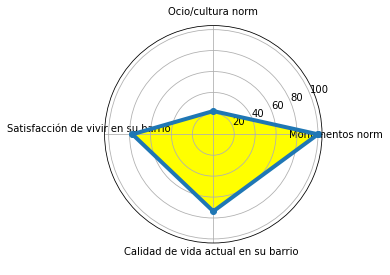

Arganzuela


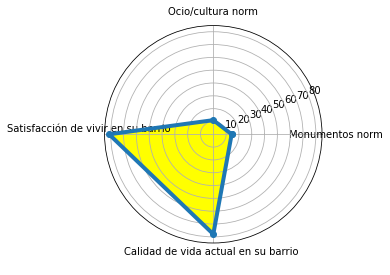

Retiro


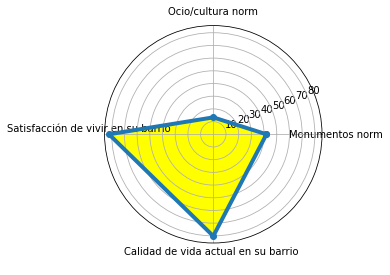

Salamanca


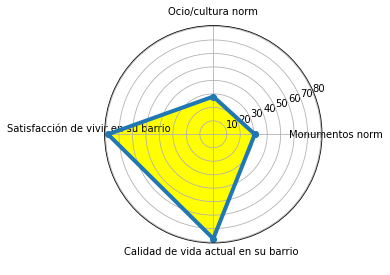

Chamartin


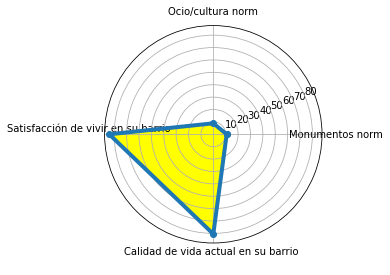

Tetuán


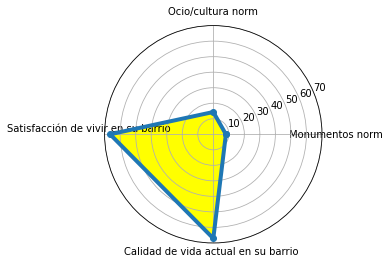

Chamberí


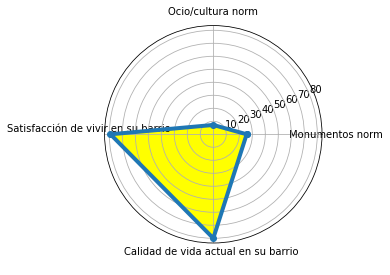

Fuencarral-El pardo


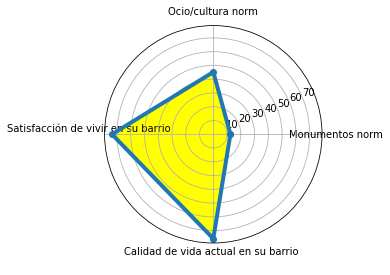

Moncloa-Aravaca


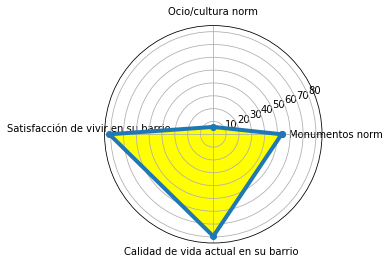

Latina


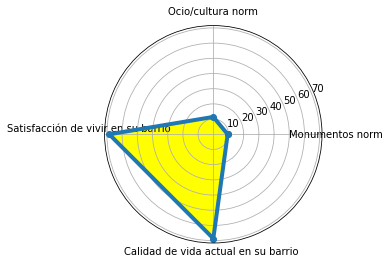

Carabanchel


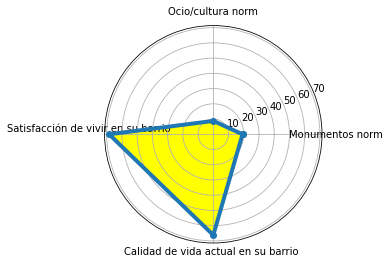

Usera


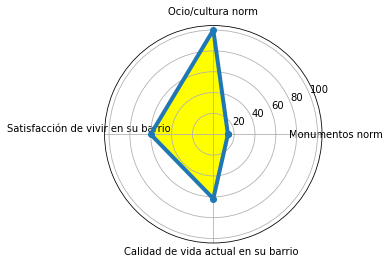

Puente de Vallecas


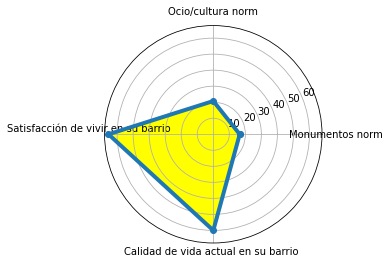

Moratalaz


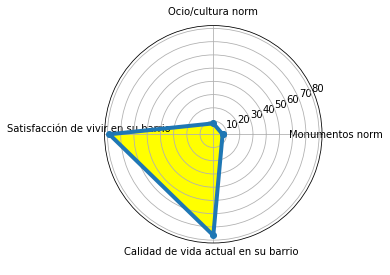

Ciudad Lineal


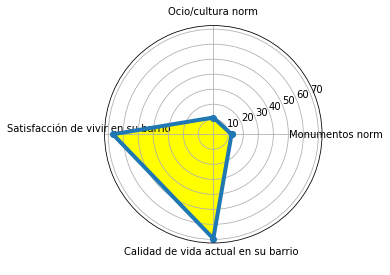

Hortaleza


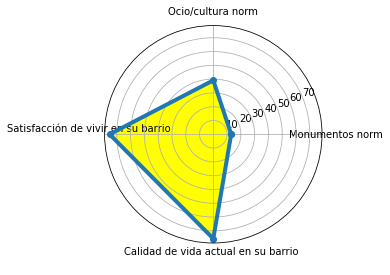

Villaverde


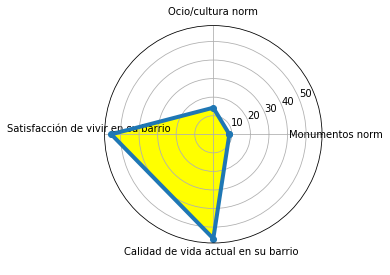

Villa de Vallecas


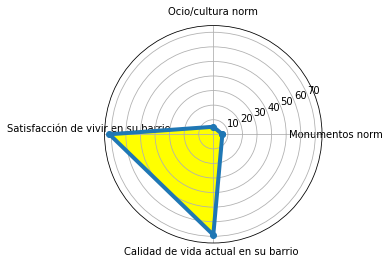

Vicálvaro


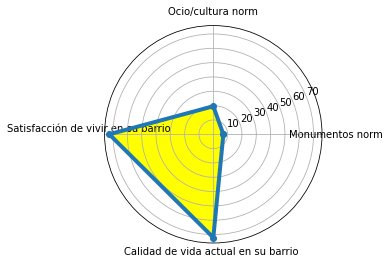

San Blas-Canillejas


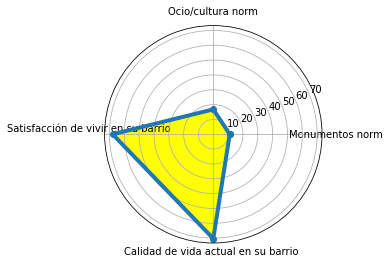

Barajas


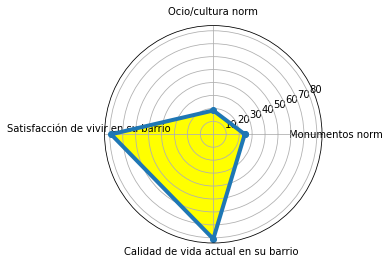

In [90]:
# Monumentos, Ocio/cultura, Satisfacción de vivir en su barrio, Calidad de vida actual en su barrio
# por distrito

for i in df_distritos.index:

    indices = [50, 51, 48, 49]

    labels = df_distritos.columns[indices]

    pattern = df_distritos.loc[i, labels]

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    # Esto es para añadir el último lado del polígono:
    pattern = np.concatenate((pattern, [pattern[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    print(df_distritos.loc[i, "Distrito"])

    fig = plt.figure()
    ax = fig.add_subplot(polar = True)

    ax.plot(angles, pattern, "o-", linewidth = 4)           # Lineas en azul
    ax.fill(angles, pattern, alpha = 1, color = "yellow")   # Relleno amarillo
    ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla

    plt.show()